['aisoco-vec', 'socorati', 'aisoco-doc2vec']
[0.53413333 0.5398     0.54606667 0.5386     0.54206667]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.93      0.72        75
           1       0.55      0.87      0.67        75
           2       0.15      0.57      0.24        75
           3       0.62      0.88      0.73        75
           4       0.15      0.77      0.25        75
           5       0.17      0.55      0.25        75
           6       0.32      0.75      0.45        75
           7       0.66      0.89      0.76        75
           8       0.27      0.89      0.41        75
           9       0.79      1.00      0.88        75
          10       0.24      0.71      0.36        75
          11       0.70      0.95      0.81        75
          12       0.17      0.61      0.27        75
          13       0.14      0.56      0.22        75
          14       0.30      0.85      0.44        75
          1

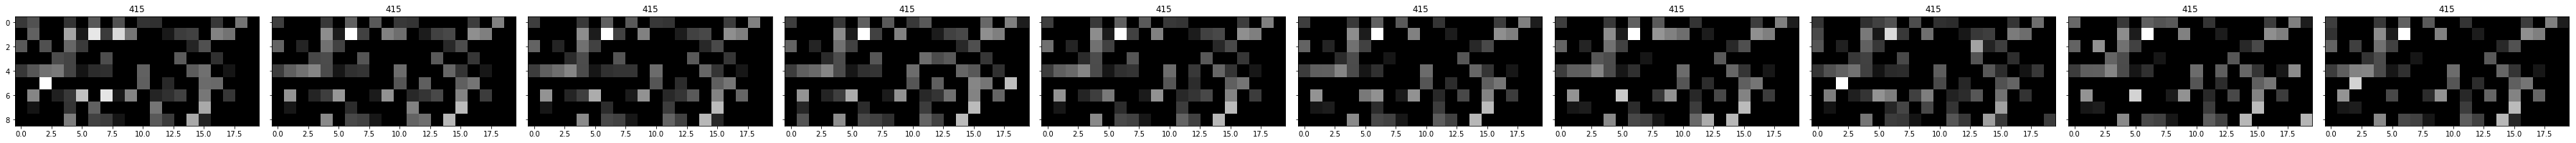

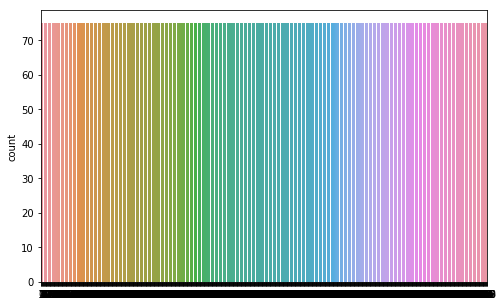

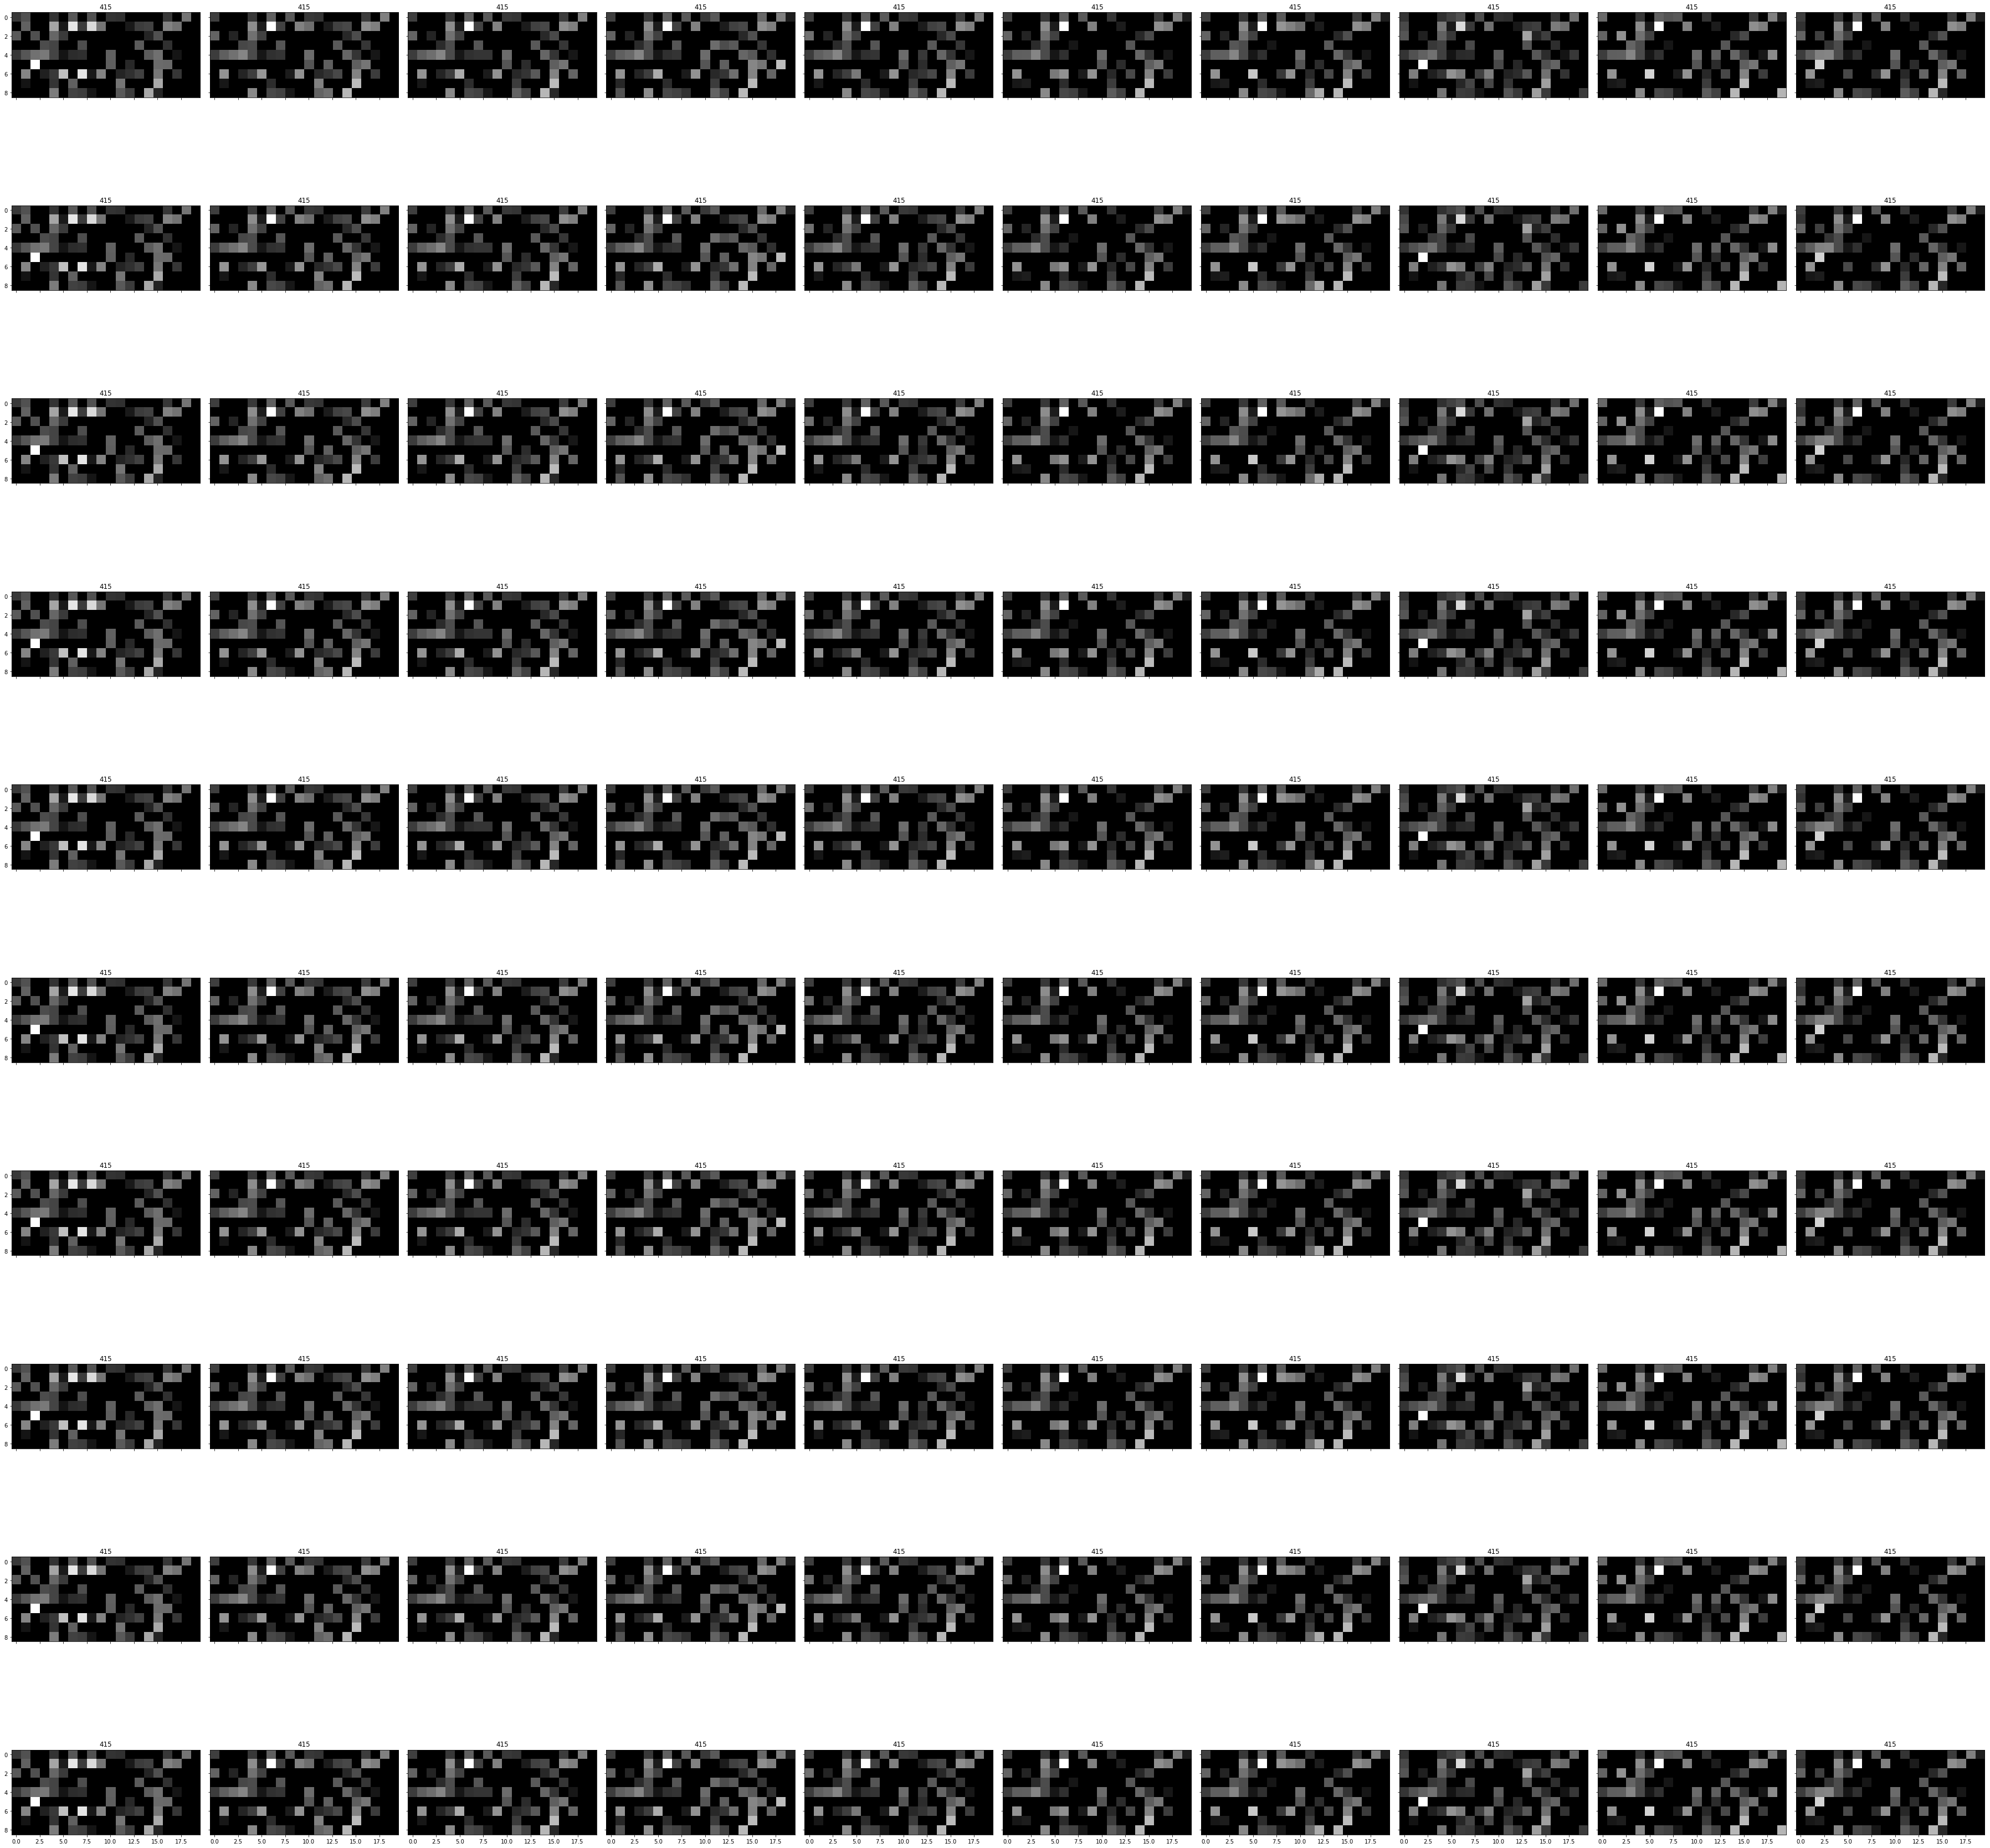

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV ,cross_val_score
import os
print(os.listdir("../input"))
img_rows, img_cols = 28, 28

def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    
    
doc = np.load('../input/aisoco-doc2vec/doc2vec.npy')
y = np.load('../input/aisoco-vec/labels.npy')
X = doc


fig, axs = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(50,50))
axs = axs.flatten()
for i in range(0,10):
    im = X[i]
    im = im.reshape(-1,9,20,1)
    axs[i].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[i].set_title(y[i])
plt.tight_layout()    

fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(y)

li_idxs = []
for i in range(10):
    for nr in range(10):
        ix = y[y==nr][i]
        li_idxs.append(ix) 
X_train = X
y_train = y

fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(50,50))
axs = axs.flatten()
for n, i in enumerate(li_idxs):
    im = X[i]
    im = im.reshape(-1,9,20,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(y[i])
plt.tight_layout()    


from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10)
print(cross_val_score(clf_knn, X, y, cv=5))
clf_knn.fit(X_train,y_train)
pred_val_knn = clf_knn.predict(X_train)
acc_knn = print_validation_report(y_train, pred_val_knn)